In [1]:
# Import pandas and numpy libraries
import pandas as pd
import numpy as np

In [2]:
'''
The purpose of this case study is to see what kind of criteria are most important when crowning
a player of the year for the English Premier League. In the case of the English Premier League, there are
two player of the year awards.
'''

'\nThe purpose of this case study is to see what kind of criteria are most important when crowning\na player of the year for the English Premier League. In the case of the English Premier League, there are\ntwo player of the year awards.\n'

In [3]:
player_data = pd.read_csv("players_1920_fin.csv", index_col = 0)
print(player_data.shape)
player_data.head()

(22502, 34)


,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,total_points,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team,ppm
1,0,0,1,0,0.1,534,37,1,0,0.0,...,1,0,0,0,4.5,False,0,Aaron Connolly,Brighton,0.222222
2,0,0,1,0,0.3,534,43,1,0,2.2,...,1,10589,13500,2911,4.5,True,0,Aaron Connolly,Brighton,0.222222
3,0,0,1,0,4.8,534,58,0,0,2.5,...,1,8090,11749,3659,4.5,False,0,Aaron Connolly,Brighton,0.222222
4,0,0,2,0,0.6,534,63,1,0,0.1,...,1,8437,13439,5002,4.5,False,0,Aaron Connolly,Brighton,0.222222
5,0,3,53,1,23.8,534,72,0,2,20.1,...,13,2156,5952,3796,4.5,True,0,Aaron Connolly,Brighton,2.888889


In [4]:
# Create a function that will return either a 1 (yes) or 0 (no) for if a player was an award winner or not.

def find_award_winners(row):
    #print(row['full'])
    if row['full'] == "Kevin De Bruyne" or row['full'] == "Jordan Henderson":
        return 1
    else:
        return 0
    
# Create a new field which defines the two players who won one of the two player of the year awards

player_data['award_winner'] = player_data.apply(lambda row : find_award_winners(row), axis = 1)
player_data.head()

,assists,bonus,bps,clean_sheets,creativity,element,fixture,goals_conceded,goals_scored,ict_index,...,transfers_balance,transfers_in,transfers_out,value,was_home,yellow_cards,full,team,ppm,award_winner
1,0,0,1,0,0.1,534,37,1,0,0.0,...,0,0,0,4.5,False,0,Aaron Connolly,Brighton,0.222222,0
2,0,0,1,0,0.3,534,43,1,0,2.2,...,10589,13500,2911,4.5,True,0,Aaron Connolly,Brighton,0.222222,0
3,0,0,1,0,4.8,534,58,0,0,2.5,...,8090,11749,3659,4.5,False,0,Aaron Connolly,Brighton,0.222222,0
4,0,0,2,0,0.6,534,63,1,0,0.1,...,8437,13439,5002,4.5,False,0,Aaron Connolly,Brighton,0.222222,0
5,0,3,53,1,23.8,534,72,0,2,20.1,...,2156,5952,3796,4.5,True,0,Aaron Connolly,Brighton,2.888889,0


In [5]:
#[print(team) for team in player_data["team"]]

In [6]:
# Statistical summary of the player data
print("Describe Player Data")
print(player_data.describe())
print("Summarized Player Data")
print(player_data.describe(include=['O']))

Describe Player Data
            assists         bonus           bps  clean_sheets    creativity  \
count  22502.000000  22502.000000  22502.000000  22502.000000  22502.000000   
mean       0.040041      0.107902      6.115012      0.104302      4.848378   
std        0.211752      0.490432      9.699022      0.305658     10.832486   
min        0.000000      0.000000    -12.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000     10.000000      0.000000      2.800000   
max        3.000000      3.000000     90.000000      1.000000    133.500000   

            element       fixture  goals_conceded  goals_scored     ict_index  \
count  22502.000000  22502.000000    22502.000000  22502.000000  22502.000000   
mean     299.079415    198.644920        0.505466      0.044485      1.782362   
std      174.854464    1

In [7]:
# Create a dictionary of all teams and the final placement in the form of a dictionary
# This will be used to see if the how a team finished the season had
# any impact on their chances for player of the year.
placement_data = {"team": ["Liverpool",
                          "Man City",
                          "Man Utd",
                          "Chelsea",
                          "Leicester",
                          "Tottenham",
                          "Wolves",
                          "Arsenal",
                          "Sheffield United",
                          "Burnley",
                          "Southampton",
                          "Everton",
                          "Newcastle United",
                          "Crystal Palace",
                          "Brighton",
                          "West Ham",
                          "Aston Villa",
                          "Bournemouth",
                          "Watford",
                          "Norwich City"], 
                 "standings": [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}

# Convert the dictionary over to a dataframe
standings = pd.DataFrame.from_dict(placement_data)
standings.head()

,team,standings
0,Liverpool,1
1,Man City,2
2,Man Utd,3
3,Chelsea,4
4,Leicester,5


In [8]:
# Create a dataframe that gives each player's overall season statistics

# Create a dataframe of each player
player_list = list(player_data["full"].unique())

# Create an empty dataframe with our specified columns
columns = ["playerName", "total_goals", "total_assists", "total_influence", "team", "award_winner"]
season_player_data = pd.DataFrame(columns=columns)

# Append each player's season statistics to the pre-defined empty dataframe
for player in player_list:
    info = {"playerName": player,
            "total_goals": 0,
            "total_assists": 0,
            "total_influence": 0,
            "team": "",
            "award_winner": ""}
    for row in player_data.itertuples(index=True, name='Pandas'):
        if row.full == player:
            info["total_goals"] += row.goals_scored
            info["total_assists"] += row.assists
            info["total_influence"] += row.influence
            info["team"] = row.team
            info["award_winner"] = row.award_winner
    season_player_data = season_player_data.append(info, ignore_index=True)
season_player_data.head()

,playerName,total_goals,total_assists,total_influence,team,award_winner
0,Aaron Connolly,3,3,150.6,Brighton,0
1,Aaron Cresswell,3,0,535.4,West Ham,0
2,Aaron Lennon,0,0,45.0,Burnley,0
3,Aaron Mooy,2,2,436.6,Brighton,0
4,Aaron Ramsdale,0,1,973.8,Bournemouth,0


In [9]:
# Now we can merge our player dataset with the placement of each of their teams.

season_player_data = season_player_data.merge(standings, on = "team", how = "left")
season_player_data.head()

,playerName,total_goals,total_assists,total_influence,team,award_winner,standings
0,Aaron Connolly,3,3,150.6,Brighton,0,15.0
1,Aaron Cresswell,3,0,535.4,West Ham,0,16.0
2,Aaron Lennon,0,0,45.0,Burnley,0,10.0
3,Aaron Mooy,2,2,436.6,Brighton,0,15.0
4,Aaron Ramsdale,0,1,973.8,Bournemouth,0,18.0


In [10]:
# I also want to look at how a team's performance can impact the prediction, so we will add each team's data on
# the goal differential and add this to our seasonPlayerData dataframe.

# Import team data from 2019 - 2020
game_data = pd.read_csv("epl2020.csv", index_col = 0)
print(game_data.shape)
game_data.head()

(576, 44)


,h_a,xG,xGA,npxG,npxGA,deep,deep_allowed,scored,missed,xpts,...,AF.x,AC.x,AY.x,AR.x,B365H.x,B365D.x,B365A.x,HtrgPerc,AtrgPerc,matchDay
1,h,2.234560,0.842407,2.234560,0.842407,11,5,4,1,2.3863,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
2,a,0.842407,2.234560,0.842407,2.234560,5,11,1,4,0.4405,...,9,2,2,0,1.14,10.0,19.00,0.466667,0.416667,Fri
3,a,3.183770,1.200300,2.422640,1.200300,9,1,5,0,2.6312,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
4,h,1.200300,3.183770,1.200300,2.422640,1,9,0,5,0.2522,...,13,1,2,0,12.00,6.5,1.22,0.600000,0.642857,Sat
5,h,1.340990,1.598640,1.340990,1.598640,4,6,1,1,1.0172,...,19,4,1,0,1.95,3.6,3.60,0.230769,0.375000,Sat


In [11]:
# Satistical summary of game data
print("Describe Game Data")
print(game_data.describe())
print("Summarized Player Data")
print(game_data.describe(include=['O']))

Describe Game Data
               xG         xGA        npxG       npxGA        deep  \
count  576.000000  576.000000  576.000000  576.000000  576.000000   
mean     1.460088    1.460088    1.371809    1.371809    6.623264   
std      0.873678    0.873678    0.800827    0.800827    4.294232   
min      0.054134    0.054134    0.054134    0.054134    0.000000   
25%      0.840033    0.840033    0.784056    0.784056    4.000000   
50%      1.275360    1.275360    1.230670    1.230670    6.000000   
75%      1.973553    1.973553    1.869485    1.869485    9.000000   
max      6.630490    6.630490    5.869320    5.869320   31.000000   

       deep_allowed      scored      missed        xpts        wins  ...  \
count    576.000000  576.000000  576.000000  576.000000  576.000000  ...   
mean       6.623264    1.361111    1.361111    1.392007    0.375000  ...   
std        4.294232    1.207865    1.207865    0.869274    0.484544  ...   
min        0.000000    0.000000    0.000000    0.000400

In [12]:
# Print a list of the columns so that we can identify which one's we need.

game_data_cols = [print(col) for col in game_data.columns]

h_a
xG
xGA
npxG
npxGA
deep
deep_allowed
scored
missed
xpts
result
date
wins
draws
loses
pts
npxGD
teamId
ppda_cal
allowed_ppda
matchtime
tot_points
round
tot_goal
tot_con
Referee.x
HS.x
HST.x
HF.x
HC.x
HY.x
HR.x
AS.x
AST.x
AF.x
AC.x
AY.x
AR.x
B365H.x
B365D.x
B365A.x
HtrgPerc
AtrgPerc
matchDay


In [13]:
# Remove all columns that are irrelevant to the question

game_data = game_data[["teamId", "scored", "missed"]]

# Rename the teamId to team
game_data.rename(columns={"teamId": "team"}, inplace = True)
game_data.head()

,team,scored,missed
1,Liverpool,4,1
2,Norwich,1,4
3,Man City,5,0
4,West Ham,0,5
5,Bournemouth,1,1


In [14]:
# Create a dataframe that gives each team's season statistics

# Create a dataframe of each team
teams = list(game_data["team"].unique())

# Create an empty dataframe with our specified columns
columns = ["team", "total_goals_for", "total_goals_against"]
season_team_stats = pd.DataFrame(columns=columns)

# Append each team's season statistics to the pre-defined empty dataframe
for team in teams:
    info = {"team": team,
            "total_goals_for": 0,
            "total_goals_against": 0}
    for row in game_data.itertuples(index=True, name='Pandas'):
        if row.team == team:
            info["total_goals_for"] += row.scored
            info["total_goals_against"] += row.missed
    season_team_stats = season_team_stats.append(info, ignore_index=True)
season_team_stats.head()

,team,total_goals_for,total_goals_against
0,Liverpool,66,21
1,Norwich,25,52
2,Man City,68,31
3,West Ham,35,50
4,Bournemouth,29,47


In [15]:
# Now that we have a dataset of all teams with their goals for an against, we can merge it into the player's data table

season_player_data = season_player_data.merge(season_team_stats, on=["team"], how="left")
season_player_data.head()

,playerName,total_goals,total_assists,total_influence,team,award_winner,standings,total_goals_for,total_goals_against
0,Aaron Connolly,3,3,150.6,Brighton,0,15.0,32,40
1,Aaron Cresswell,3,0,535.4,West Ham,0,16.0,35,50
2,Aaron Lennon,0,0,45.0,Burnley,0,10.0,34,40
3,Aaron Mooy,2,2,436.6,Brighton,0,15.0,32,40
4,Aaron Ramsdale,0,1,973.8,Bournemouth,0,18.0,29,47


In [16]:
# Satistical summary of our player data
print("Describe Game Data")
print(season_player_data.describe())
print("Summarized Player Data")
print(season_player_data.describe(include=['O']))

Describe Game Data
       total_influence   standings
count       666.000000  633.000000
mean        249.890991   10.146919
std         268.725237    5.399153
min           0.000000    1.000000
25%           1.200000    6.000000
50%         171.100000   10.000000
75%         435.750000   15.000000
max        1322.200000   19.000000
Summarized Player Data
       playerName  total_goals  total_assists      team  award_winner  \
count         666          666            666       666           666   
unique        666           22             16        20             2   
top     Eric Dier            0              0  West Ham             0   
freq            1          404            376        39           664   

        total_goals_for  total_goals_against  
count               666                  666  
unique               17                   17  
top                  35                   40  
freq                 77                  101  


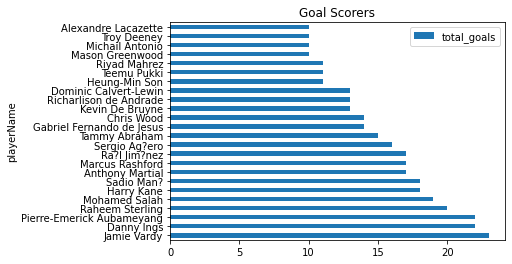

In [17]:
# From here, we want to see some visual representations of our dataset
%matplotlib inline

#If we were to look at all of our players, our plot would be illegible. Instead, we will look at our top 24
top_goal_scorers = season_player_data.sort_values(by="total_goals", ascending = False)[:24]
#Goal bar chart
top_goal_scorers.plot.barh(x='playerName', 
                          y='total_goals', 
                          title='Goal Scorers')

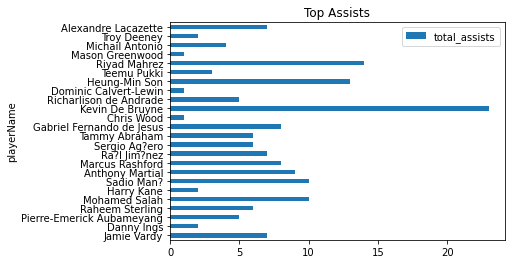

In [18]:
#If we were to look at all of our players, our plot would be illegible. Instead, we will look at our top 24 assist makers
top_assist_makers = season_player_data.sort_values(by="total_assists", ascending = False)[:24]
#Assist bar chart
top_goal_scorers.plot.barh(x='playerName', 
                          y='total_assists', 
                          title='Top Assists')

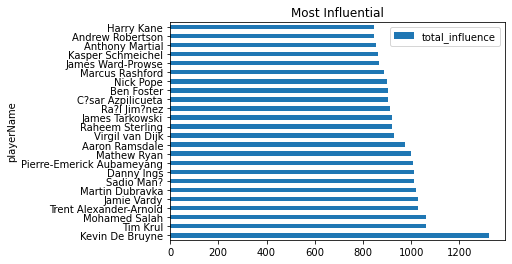

In [19]:
#If we were to look at all of our players, our plot would be illegible. Instead, we will look at our top 24 assist makers
most_influ_players = season_player_data.sort_values(by="total_influence", ascending = False)[:24]
#Assist bar chart
most_influ_players.plot.barh(x='playerName', 
                          y='total_influence', 
                          title='Most Influential')

In [20]:
# After reviewing our data, we can start to see how a player like Kevin De Brunye would end up with one of the 
# player of the year awards due to his high assist count, high level of influence in games, and he was also
# in the top 25 goal scorers. 

# From here, we should start looking at feature selection. Step one is seeing if any encoding is needed and if
# it is, we will need to decide what kind to use. So let's take a look at our dataset as it currently exists.

season_player_data.head()

,playerName,total_goals,total_assists,total_influence,team,award_winner,standings,total_goals_for,total_goals_against
0,Aaron Connolly,3,3,150.6,Brighton,0,15.0,32,40
1,Aaron Cresswell,3,0,535.4,West Ham,0,16.0,35,50
2,Aaron Lennon,0,0,45.0,Burnley,0,10.0,34,40
3,Aaron Mooy,2,2,436.6,Brighton,0,15.0,32,40
4,Aaron Ramsdale,0,1,973.8,Bournemouth,0,18.0,29,47


In [21]:
# After reviewing this data, there is no need to include the categorial data (player name and team name), so
# no encoding is need, but we will need to remove those fields. 

# Save the current state of the season_player_data dataframe for future use
saved_season_player_data = season_player_data

cols = ["total_goals", 
        "total_assists", 
        "total_influence", 
        "award_winner", 
        "standings", 
        "total_goals_for",
        "total_goals_against"]

season_player_data = season_player_data[cols]


saved_season_player_data.head()

,playerName,total_goals,total_assists,total_influence,team,award_winner,standings,total_goals_for,total_goals_against
0,Aaron Connolly,3,3,150.6,Brighton,0,15.0,32,40
1,Aaron Cresswell,3,0,535.4,West Ham,0,16.0,35,50
2,Aaron Lennon,0,0,45.0,Burnley,0,10.0,34,40
3,Aaron Mooy,2,2,436.6,Brighton,0,15.0,32,40
4,Aaron Ramsdale,0,1,973.8,Bournemouth,0,18.0,29,47


In [22]:
# Due to an unbalanced dataset, which was later discovered, we are adding several past award winners to our dataset.
# Several of these players played in the EPL in 2019 - 2020, so we have added a 1 to the end of their name to differentiate
# their award winning season from their 2019 - 2020 season. 

winners = pd.read_csv("award_winners.csv")
winners.head()

,playerName,total_goals,total_assists,total_influence,award_winner,team,standings,total_goals_for,total_goals_against
0,Virgil van Dijk1,5,1,1302.2,1,Liverpool,1,85,33
1,Mohamed Salah1,22,10,1201.5,1,Liverpool,2,84,38
2,N'Golo Kante1,1,1,1298.6,1,Chelsea,1,85,33
3,Jamie Vardy1,24,8,1156.4,1,Leicester,1,68,36
4,Eden Hazard,14,10,1113.2,1,Chelsea,1,73,32


In [23]:
# Add our past winners to our overall player dataframe

saved_season_player_data = saved_season_player_data.append(winners)

# Remove categorical data as it will have no impact on our model output
saved_season_player_data.drop(columns=['playerName', 'team'], inplace = True)

# For some players, they changed teams mid-way through the season and their resulting team was null. We replaced their data 
# with the mean value instead.
saved_season_player_data = saved_season_player_data.fillna(season_player_data.mean())

saved_season_player_data.head()

,total_goals,total_assists,total_influence,award_winner,standings,total_goals_for,total_goals_against
0,3,3,150.6,0,15.0,32,40
1,3,0,535.4,0,16.0,35,50
2,0,0,45.0,0,10.0,34,40
3,2,2,436.6,0,15.0,32,40
4,0,1,973.8,0,18.0,29,47


In [24]:
saved_season_player_data.describe()

,total_goals,total_assists,total_influence,award_winner,standings,total_goals_for,total_goals_against
count,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000,687.000000
mean,1.858806,1.563319,275.930568,0.033479,9.910987,39.963610,39.452693
std,4.099226,2.735949,303.460215,0.180015,5.357656,14.035466,9.318014
min,0.000000,0.000000,0.000000,0.000000,1.000000,25.000000,21.000000
25%,0.000000,0.000000,2.100000,0.000000,5.000000,30.000000,32.000000
50%,0.000000,0.000000,184.400000,0.000000,10.000000,35.000000,40.000000
75%,2.000000,2.000000,456.200000,0.000000,14.000000,47.000000,47.000000
max,31.000000,23.000000,1322.200000,1.000000,19.000000,106.000000,56.000000


In [25]:
# Now that our data has been processed, we can start the feature selection process. 

# import the SelectKBest function to find our best features in this dataset.
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# I want to simplify my X and y value in the season_player_data dataset, so I will pop the award_winner field and
# add it back to the dataset
award = saved_season_player_data.pop("award_winner")
saved_season_player_data["award_winner"] = award

# Instantiate our model with a chi-squared scoring approach where we will return our top 4 features
sel = SelectKBest(chi2, k=4)

# Fit your model with the X and y fields
sel.fit(saved_season_player_data.iloc[:, :-2], saved_season_player_data["award_winner"])

# Transform the dataframe
sel.transform(saved_season_player_data.iloc[:, :-2])

# print out the scoring output from the chi-squared approach
print("Scores")
print(sel.scores_)

#print out the p-values from the feature selection
print("p-values")
print(sel.pvalues_)

Scores
[ 1515.53507619   783.81038271 56980.43263658   137.34292627
   832.20120773]
p-values
[0.00000000e+000 1.78657065e-172 0.00000000e+000 1.01459539e-031
 5.38405406e-183]


In [26]:
# Find the list of features that were selected
cols = sel.get_support(indices=True)

# Create dataframe with the selected features from our model
best_feats_player_data = saved_season_player_data.iloc[:,cols]
best_feats_player_data.head()

,total_goals,total_assists,total_influence,total_goals_for
0,3,3,150.6,32
1,3,0,535.4,35
2,0,0,45.0,34
3,2,2,436.6,32
4,0,1,973.8,29


In [27]:
# Train-test split 
from sklearn.model_selection import train_test_split

# Due to having an unbalaned dataset, we use the stratify argument to evenly disperse our winners across the training and testing data
X_train, X_val, y_train, y_val = train_test_split(best_feats_player_data.iloc[:], saved_season_player_data["award_winner"], test_size=.4, stratify = saved_season_player_data["award_winner"])

In [28]:
print("No. of samples in training set:", X_train.shape[0])
print("No. of samples in validation set:", X_val.shape[0])

No. of samples in training set: 412
No. of samples in validation set: 275


In [29]:
X_train

,total_goals,total_assists,total_influence,total_goals_for
576,0,0,0.0,35
103,1,5,235.2,51
264,1,4,368.6,25
641,5,2,930.2,66
283,0,0,0.0,30
...,...,...,...,...
578,0,0,0.0,26
195,1,7,711.6,25
529,0,0,75.4,30
39,0,0,0.0,34


In [30]:
y_train

576    0
103    0
264    0
641    0
283    0
      ..
578    0
195    0
529    0
39     0
477    0
Name: award_winner, Length: 412, dtype: int64

G:\Anaconda\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
G:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


0.9854545454545455

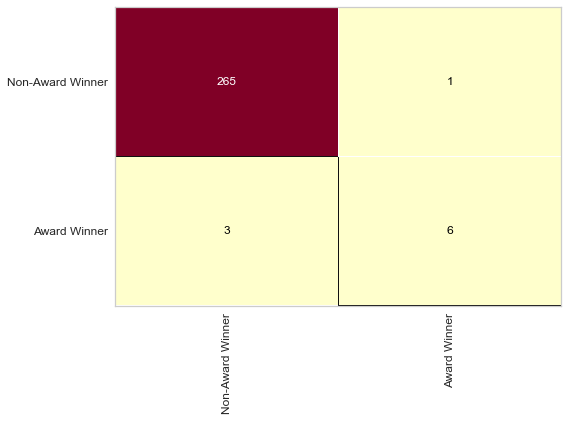

In [31]:
from sklearn.linear_model import LogisticRegression

from yellowbrick.classifier import ConfusionMatrix
from yellowbrick.classifier import ClassificationReport
from yellowbrick.classifier import ROCAUC

# Instantiate our classification model
model = LogisticRegression()

# Instantiate the ConfusionMatrix
classes = ["Non-Award Winner", "Award Winner"]
cm = ConfusionMatrix(model, classes=classes)

# Fit the model with our training data
cm.fit(X_train, y_train)

# Create the confusion matrix by feeding into the validation data into our model
cm.score(X_val, y_val)

G:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


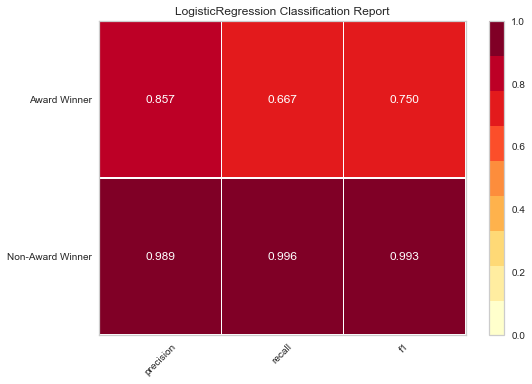

In [32]:
# Check the scores 
cm.poof()

# Instantiate the visualizer
vis = ClassificationReport(model, classes=classes)

vis.fit(X_train, y_train)
vis.score(X_val, y_val)
g = vis.poof()

G:\Anaconda\lib\site-packages\sklearn\base.py:209: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  warnings.warn('From version 0.24, get_params will raise an '


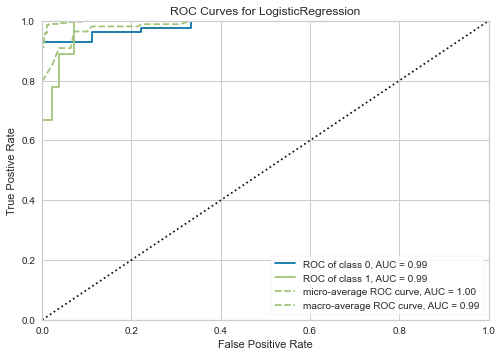

In [33]:
# Instantiate the visualizer for with ROCAUC
vis = ROCAUC(model)

vis.fit(X_train, y_train)
vis.score(X_val, y_val)

g=vis.poof()